In [74]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

In [75]:
data=pd.read_csv(r"C:\Users\Riddhima\Downloads\crime_data(1).csv")


In [76]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [77]:
data.shape

(50, 5)

In [78]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [79]:
data.value_counts()

Unnamed: 0      Murder  Assault  UrbanPop  Rape
Alabama         13.2    236      58        21.2    1
Pennsylvania    6.3     106      72        14.9    1
Nevada          12.2    252      81        46.0    1
New Hampshire   2.1     57       56        9.5     1
New Jersey      7.4     159      89        18.8    1
New Mexico      11.4    285      70        32.1    1
New York        11.1    254      86        26.1    1
North Carolina  13.0    337      45        16.1    1
North Dakota    0.8     45       44        7.3     1
Ohio            7.3     120      75        21.4    1
Oklahoma        6.6     151      68        20.0    1
Oregon          4.9     159      67        29.3    1
Rhode Island    3.4     174      87        8.3     1
Alaska          10.0    263      48        44.5    1
South Carolina  14.4    279      48        22.5    1
South Dakota    3.8     86       45        12.8    1
Tennessee       13.2    188      59        26.9    1
Texas           12.7    201      80        25.5    

In [80]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [82]:
# model creation using k-means
#normalization
def nrml_data(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [83]:
normal_data=nrml_data(data.iloc[:,1:])


In [84]:
from sklearn.cluster import KMeans

c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\skle

c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


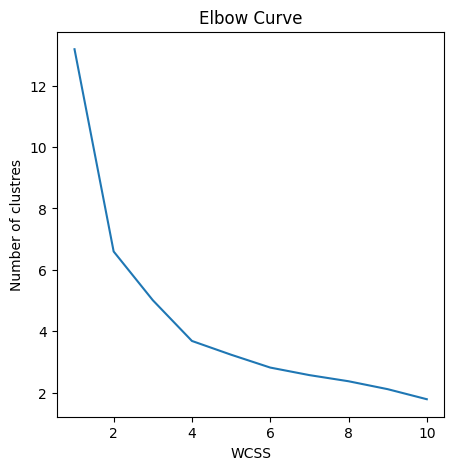

In [85]:
fig = plt.figure(figsize=(5,5))
plt.title("Elbow Curve")
WCSS=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(normal_data)
    WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.xlabel("WCSS")
plt.ylabel("Number of clustres")
plt.show()

In [86]:
#we assume that here k =4 be the no of clusters

In [87]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
model1= KMeans(n_clusters=4)
model1.fit(normal_data)
pred=model1.labels_
data['kmeans_cluster'] = pred

# Perform Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical_model.fit_predict(normal_data)
data['Hierarchical_Clusters'] = hierarchical_labels

# Perform DBSCAN Clustering
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(normal_data)
data['DBSCAN_Clusters'] = dbscan_labels

data.head()



c:\Users\Riddhima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans_cluster,Hierarchical_Clusters,DBSCAN_Clusters
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,3,0,0
2,Arizona,8.1,294,80,31.0,3,0,0
3,Arkansas,8.8,190,50,19.5,0,1,0
4,California,9.0,276,91,40.6,3,0,0


In [88]:
model1.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [89]:
model1.inertia_

3.6834561535859143

<Figure size 1800x500 with 0 Axes>

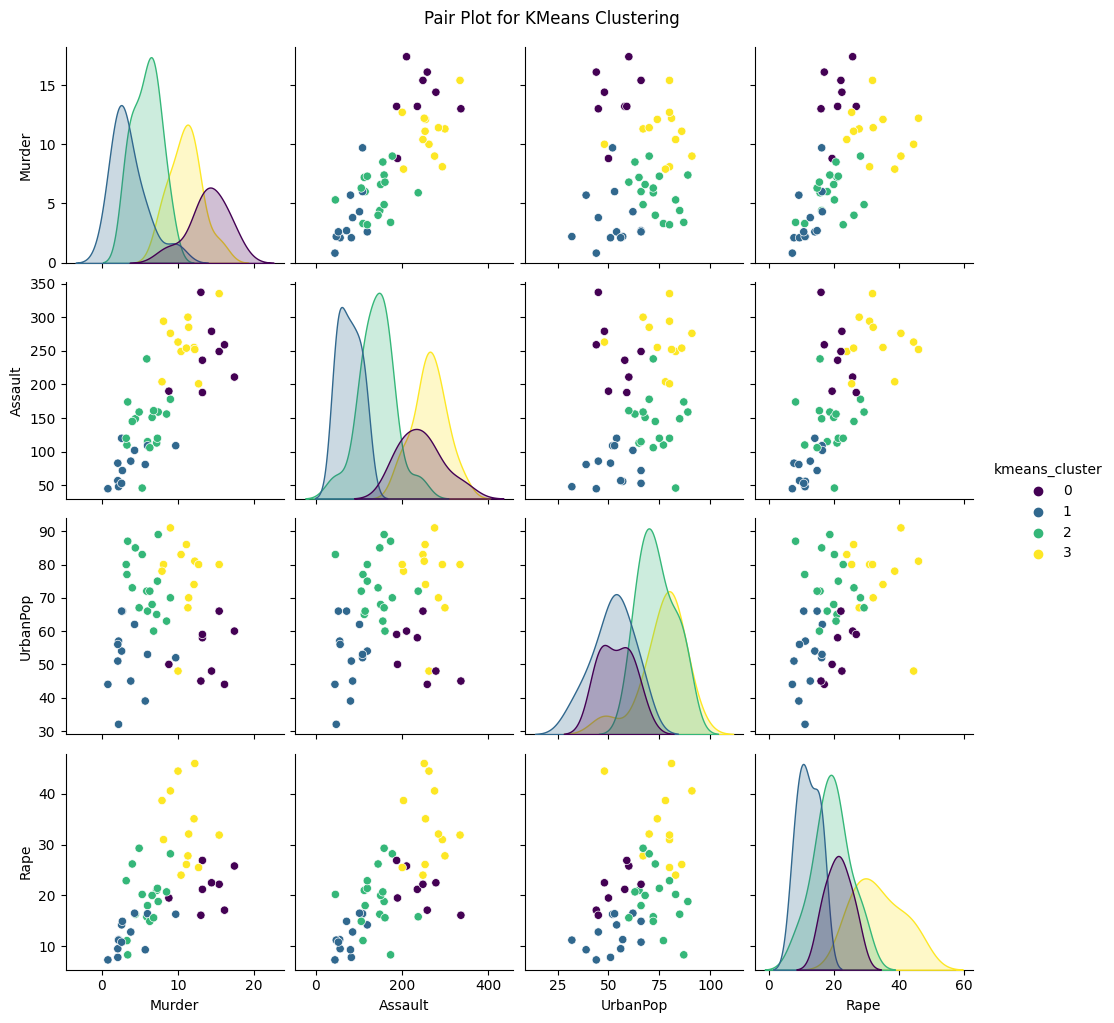

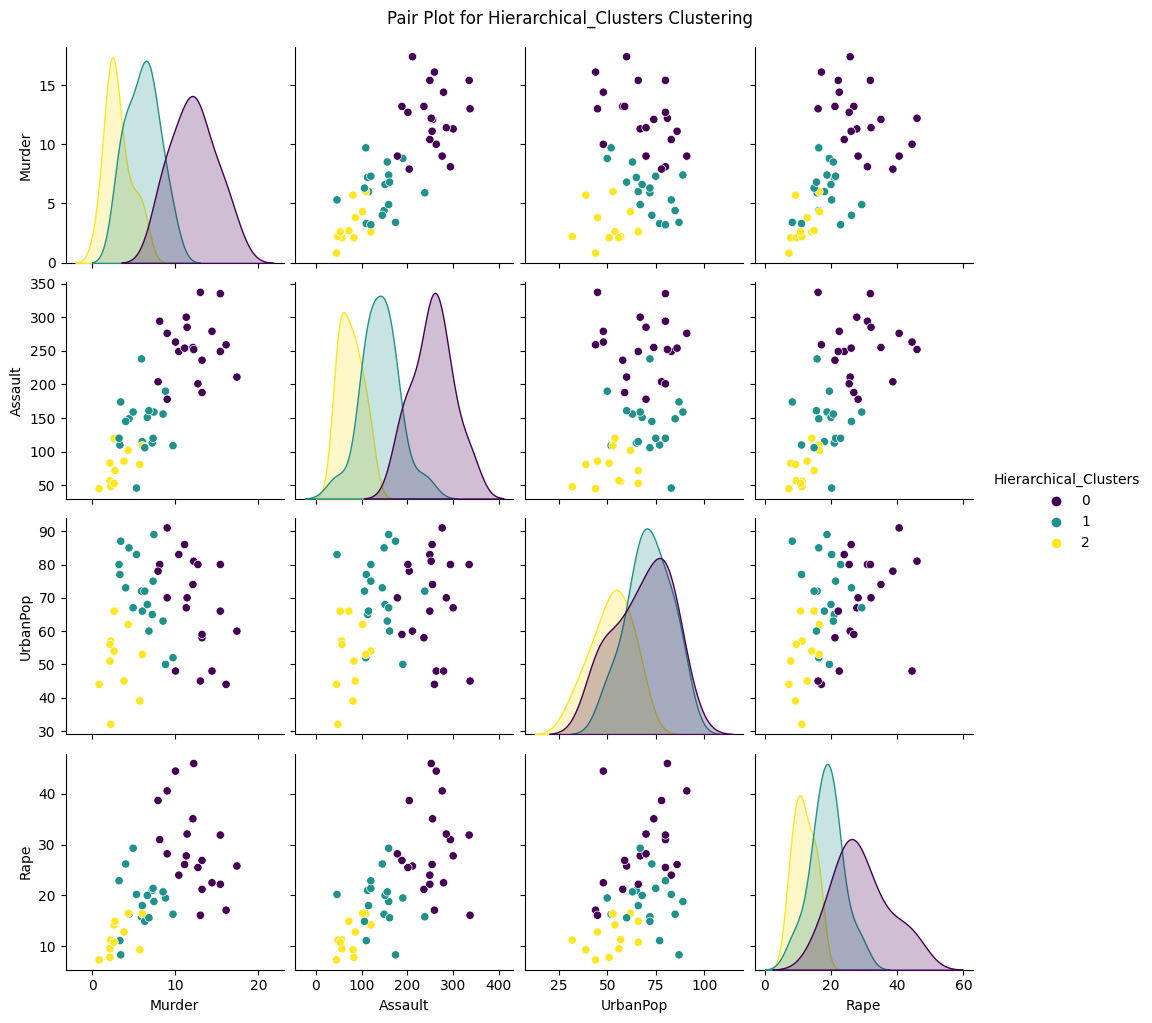

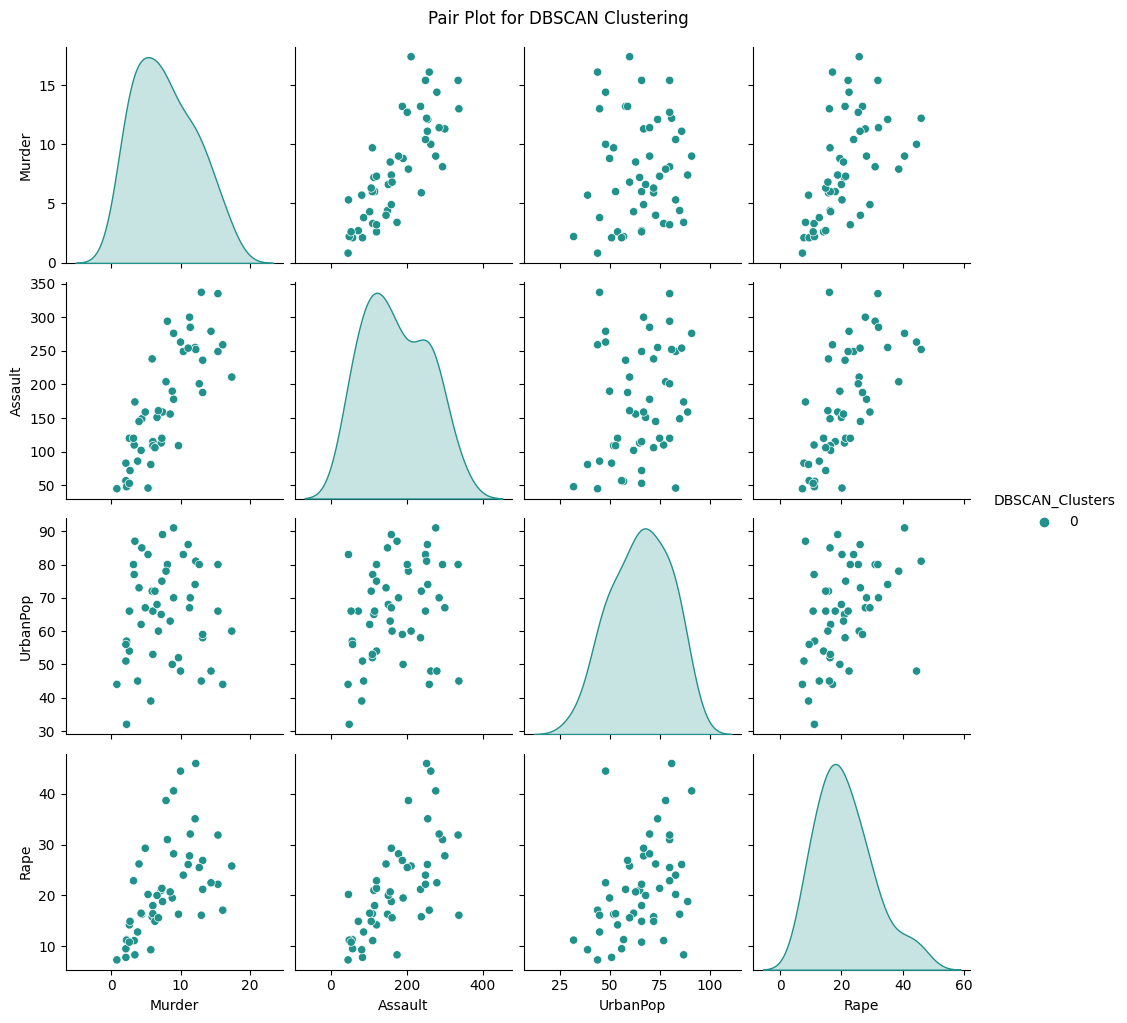

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with clustering results
plt.figure(figsize=(18, 5))

# Select relevant features and cluster labels
data_features = data[['Murder', 'Assault', 'UrbanPop', 'Rape', 'kmeans_cluster','Hierarchical_Clusters','DBSCAN_Clusters']]

# Create pair plots
sns.pairplot(data_features, hue='kmeans_cluster', palette='viridis', diag_kind='kde', vars=['Murder', 'Assault', 'UrbanPop', 'Rape'])
plt.suptitle('Pair Plot for KMeans Clustering', y=1.02)
plt.show()

# Hierarchical Clustering
# Create pair plots
sns.pairplot(data_features, hue='Hierarchical_Clusters', palette='viridis', diag_kind='kde', vars=['Murder', 'Assault', 'UrbanPop', 'Rape'])
plt.suptitle('Pair Plot for Hierarchical_Clusters Clustering', y=1.02)
plt.show()

# DBSCAN Clustering
# Create pair plots
sns.pairplot(data_features, hue='DBSCAN_Clusters', palette='viridis', diag_kind='kde', vars=['Murder', 'Assault', 'UrbanPop', 'Rape'])
plt.suptitle('Pair Plot for DBSCAN Clustering', y=1.02)
plt.show()





In [91]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans_cluster,Hierarchical_Clusters,DBSCAN_Clusters
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,3,0,0
2,Arizona,8.1,294,80,31.0,3,0,0
3,Arkansas,8.8,190,50,19.5,0,1,0
4,California,9.0,276,91,40.6,3,0,0
